# Pawpularity Score

In [1]:
#load in packages
import os
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Import Data
Quelle: https://www.kaggle.com/code/alexteboul/tutorial-part-1-eda-for-beginners

In [2]:
%%capture
#%%capture hides the output of this from being printed. 
#Try removing it to see what happens!

#this for loop goes through the directory and prints out all the filenames. 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#source path (where the Pawpularity contest data resides)
path = '../input/'

#Get the metadata (the .csv data) and put it into DataFrames
train_df = pd.read_csv(path + 'train.csv')
test_df = pd.read_csv(path + 'test.csv')

#Get the image data (the .jpg data) and put it into lists of filenames
train_jpg = glob(path + "train/*.jpg")
test_jpg = glob(path + "test/*.jpg")

## Explore Meta-Data (csv) 

In [4]:
#show the dimensions of the train metadata.
print('train_df dimensions: ', train_df.shape)
print('train_df column names: ', train_df.columns.values.tolist())

#print an extra row could use '\n' as well in a print statement
print('')

#show the dimensions of the test metadata
print('test_df dimensions: ',test_df.shape)
print('test_df column names: ', test_df.columns.values.tolist())

train_df dimensions:  (9912, 14)
train_df column names:  ['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur', 'Pawpularity']

test_df dimensions:  (8, 13)
test_df column names:  ['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']


In [5]:
#show the type of train_jpg and test_jpg as well as length of the list.
print('train_jpg is of type ',type(train_jpg), ' and length ', len(train_jpg))
#Also show the first 3 elements
print('train_jpg list 1st 3 elements: ', train_jpg[0:3], '\n')

print('test_jpg is of type ',type(test_jpg), ' and length ', len(test_jpg))
#Also show the first 3 elements
print('test_jpg list 1st 3 elements: ', test_jpg[0:3])

train_jpg is of type  <class 'list'>  and length  9912
train_jpg list 1st 3 elements:  ['../input/train/2ba808b11e2e7302c65c1142fae20328.jpg', '../input/train/492babff6c77d1f1be8e266cc7c89ab4.jpg', '../input/train/80fefdaf088a47eeea3d67d30ecf5f2c.jpg'] 

test_jpg is of type  <class 'list'>  and length  8
test_jpg list 1st 3 elements:  ['../input/test/80bc3ccafcc51b66303c2c263aa38486.jpg', '../input/test/4128bae22183829d2b5fea10effdb0c3.jpg', '../input/test/43a2262d7738e3d420d453815151079e.jpg']


In [6]:
#show the first 5 rows of the train_df dataframe
train_df.head()
#train_df.head(10) #this would show 10 rows instead. 5 is the default

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72

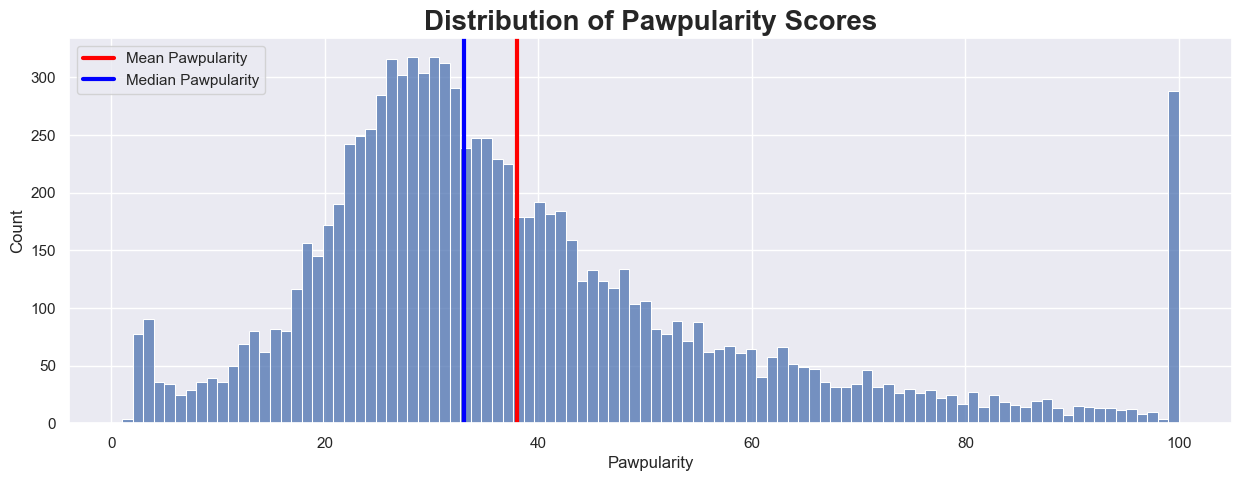

In [7]:
#Lets see a the distribution of Pawpularity Scores
sns.set(rc={'figure.figsize':(15,5)})
fig = plt.figure()

sns.histplot(data=train_df, x='Pawpularity', bins=100)
plt.axvline(train_df['Pawpularity'].mean(), c='red', ls='-', lw=3, label='Mean Pawpularity')
plt.axvline(train_df['Pawpularity'].median(),c='blue',ls='-',lw=3, label='Median Pawpularity')

plt.title('Distribution of Pawpularity Scores', fontsize=20, fontweight='bold')
plt.legend()
plt.show()

In [8]:
#Calling .describe() lets you see the distribution in a numerical way
train_df[['Pawpularity']].describe()

Pawpularity
count  9912.000000
mean     38.039044
std      20.591990
min       1.000000
25%      25.000000
50%      33.000000
75%      46.000000
max     100.000000

/var/folders/7l/64k945l9567573m_x6qrs0_80000gn/T/ipykernel_10442/3307411582.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


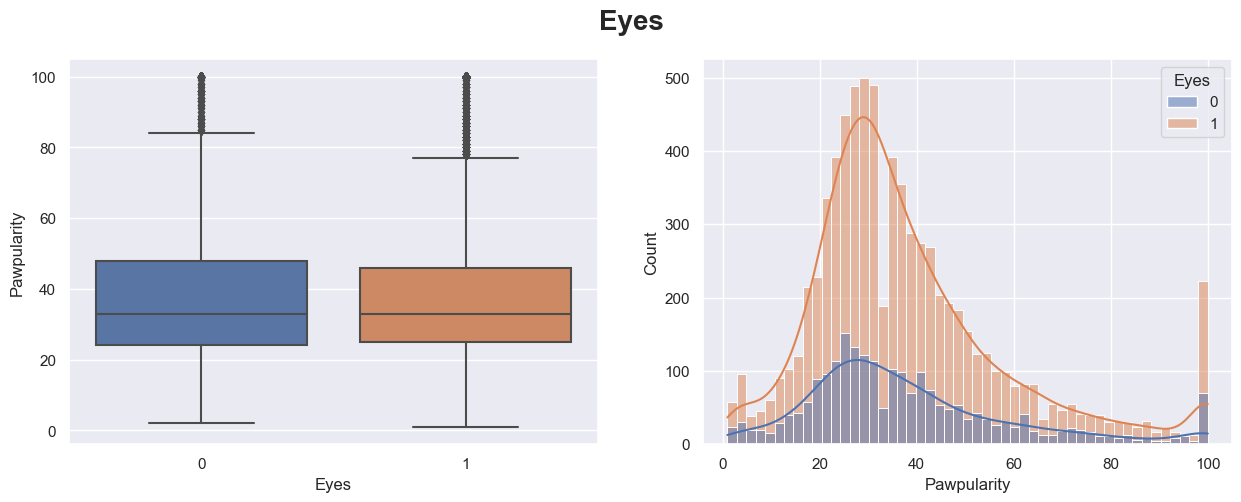

In [9]:
#Let's start with just one variable to demonstrate
fig, ax = plt.subplots(1,2)

sns.boxplot(data=train_df, x='Eyes', y='Pawpularity', ax=ax[0])
sns.histplot(train_df, x="Pawpularity", hue="Eyes", kde=True, ax=ax[1])

plt.suptitle("Eyes", fontsize=20, fontweight='bold')
fig.show()

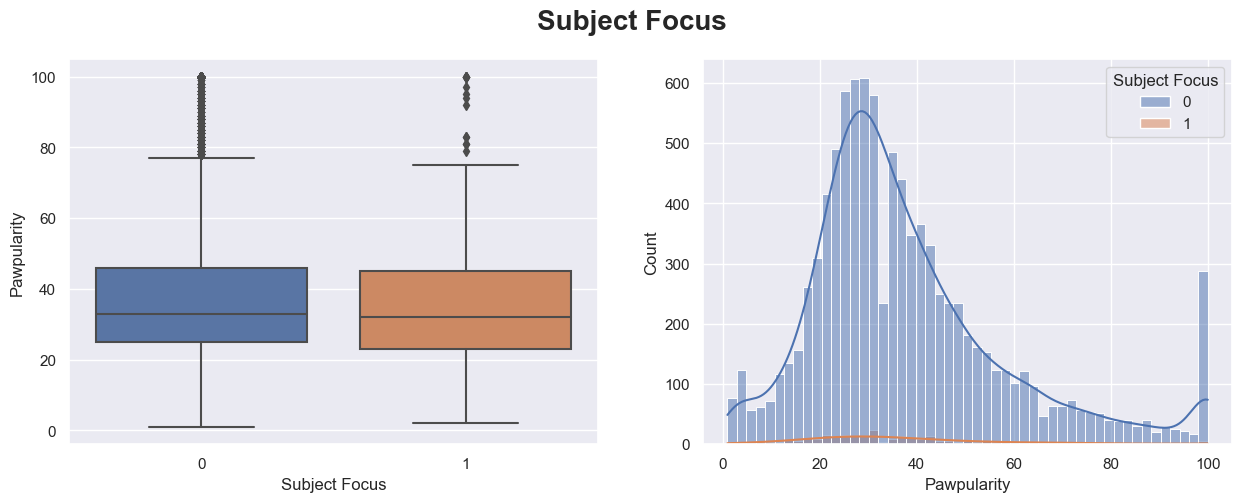

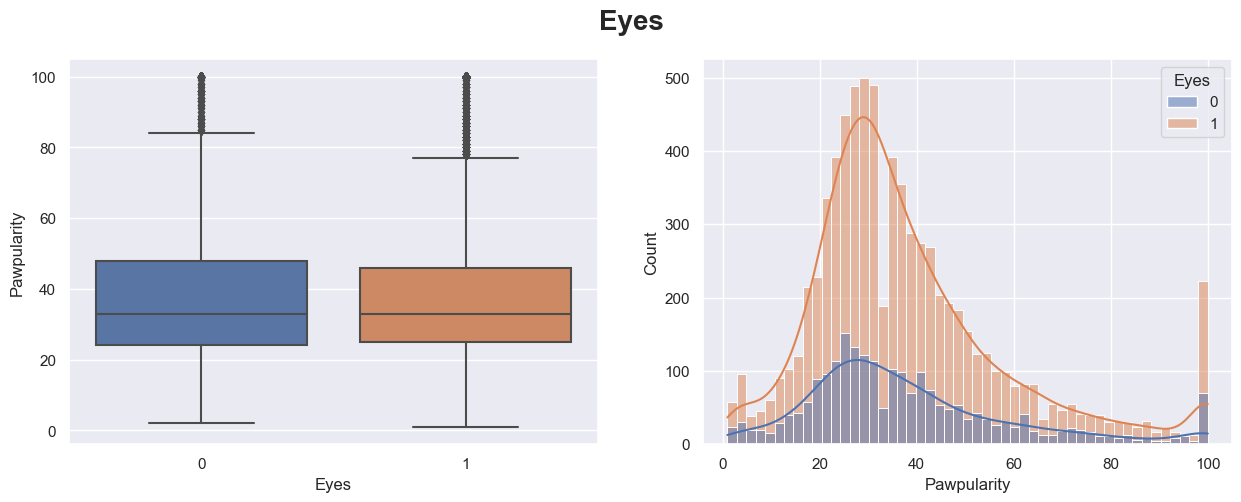

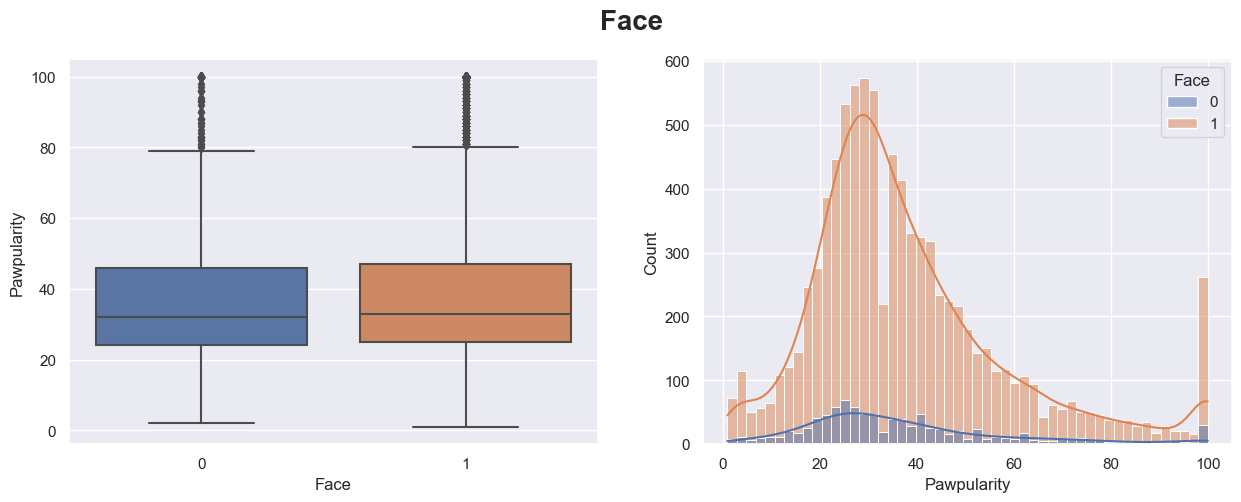

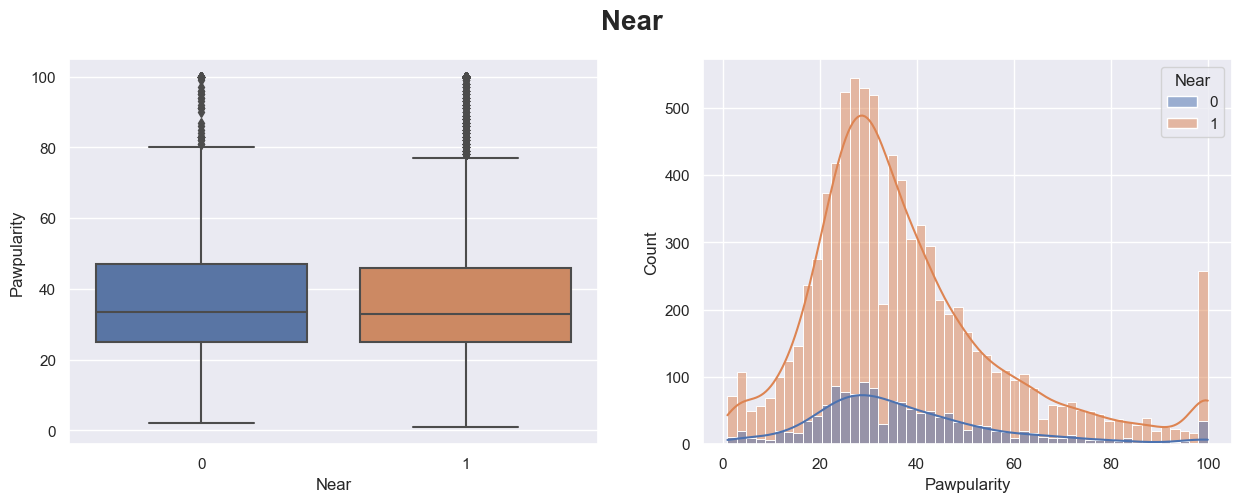

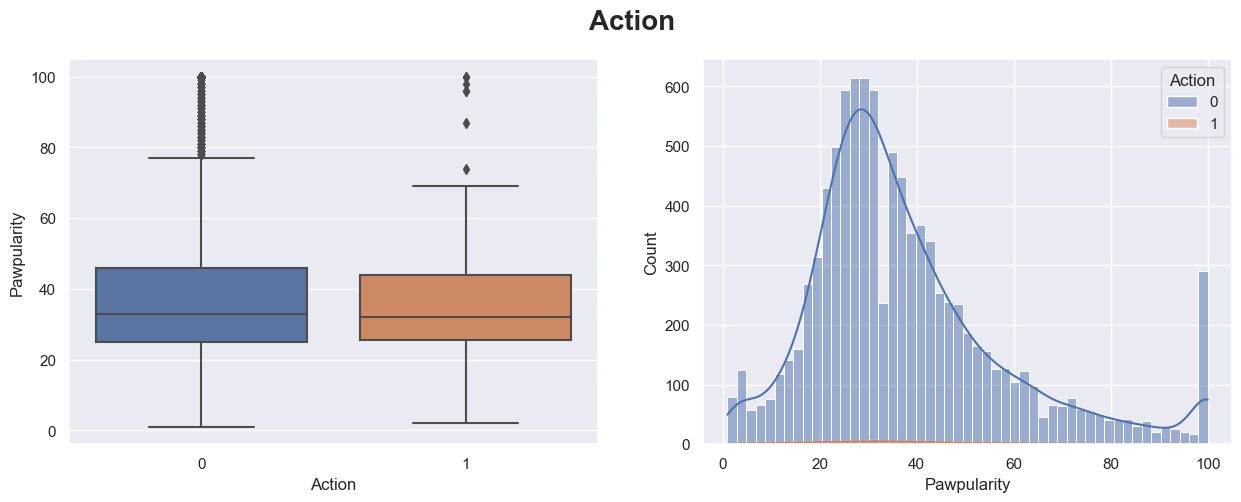

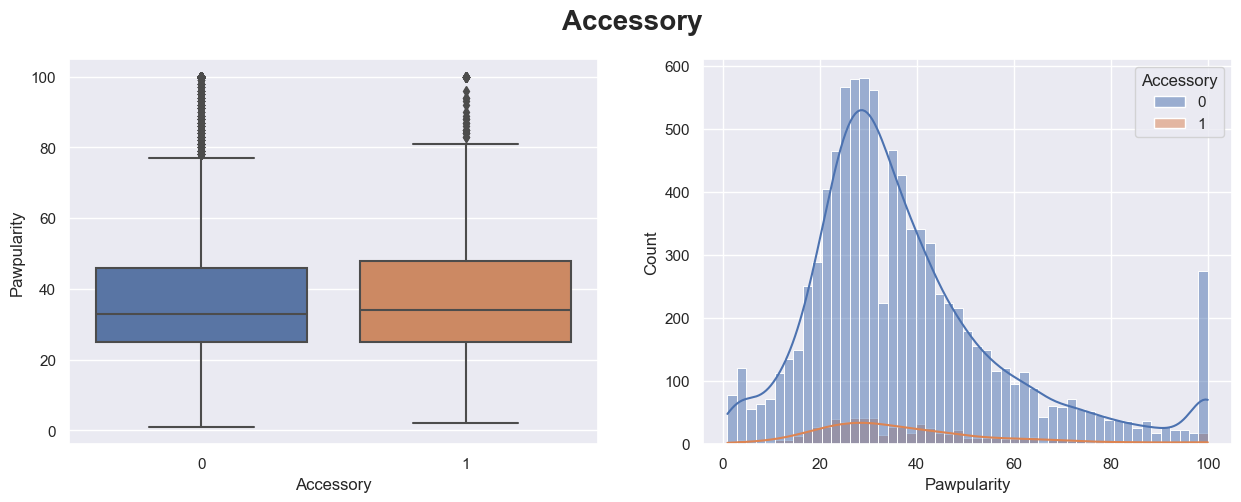

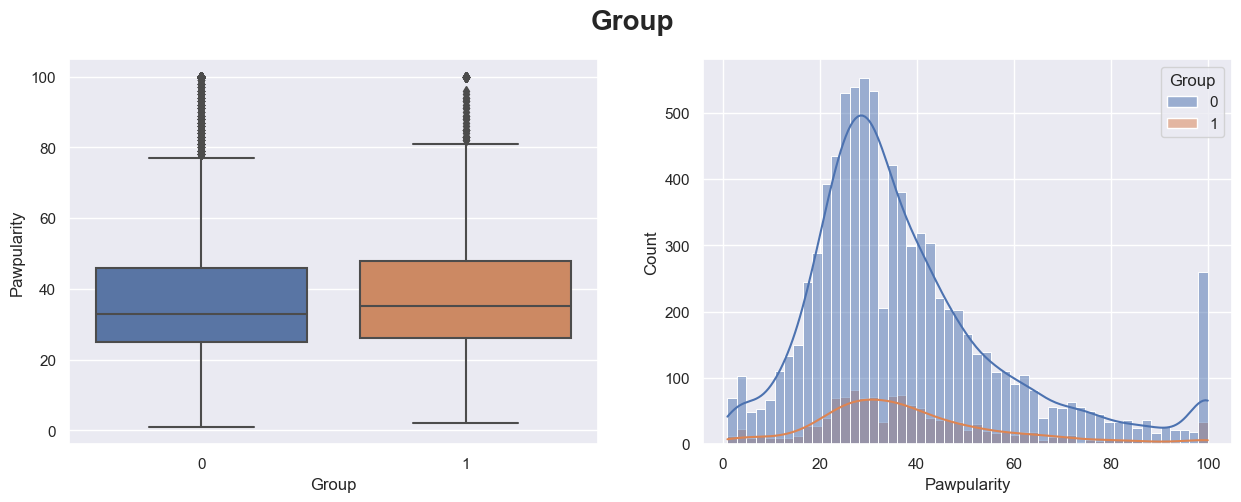

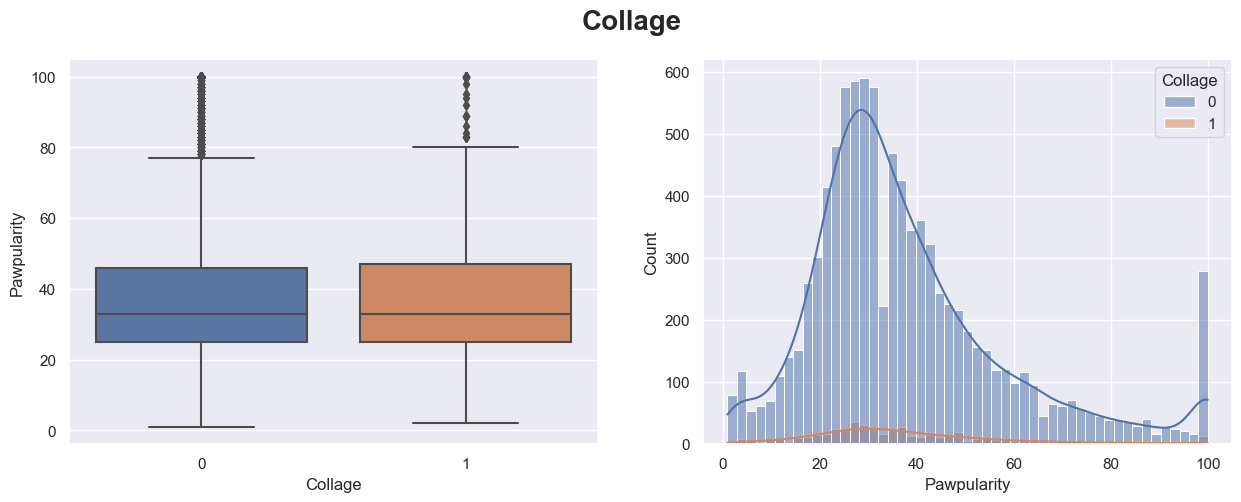

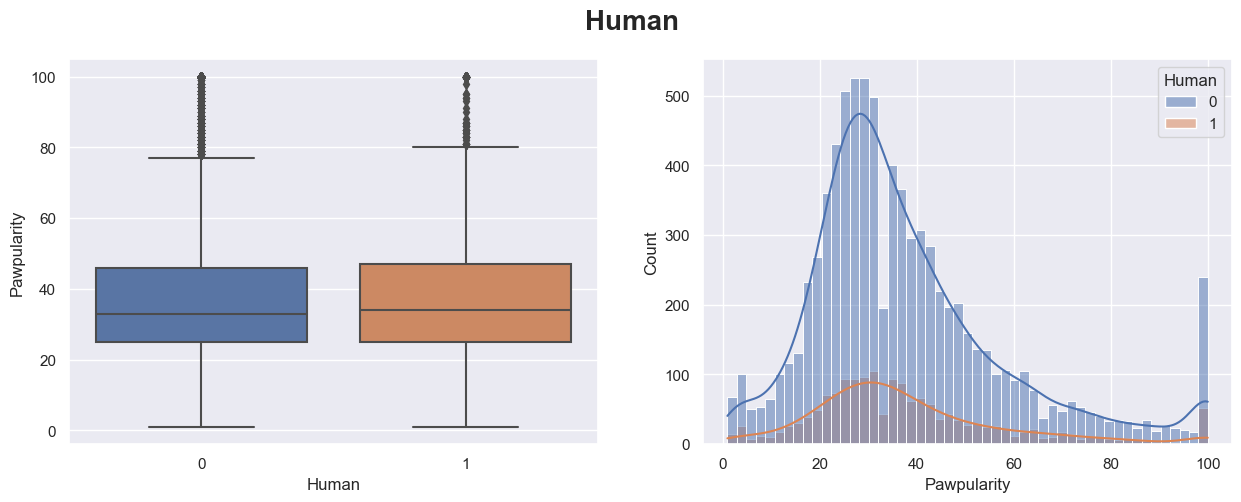

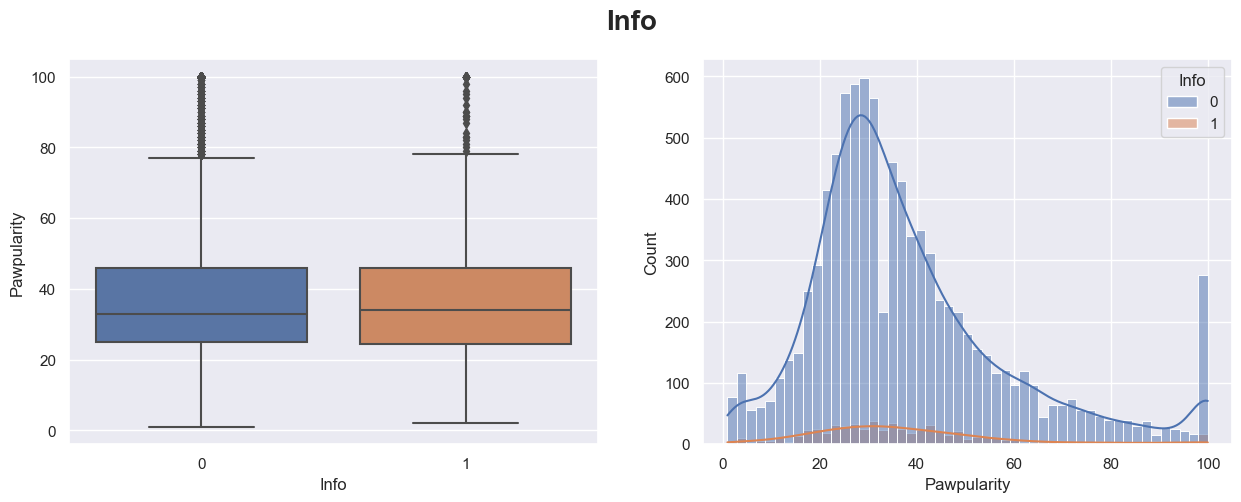

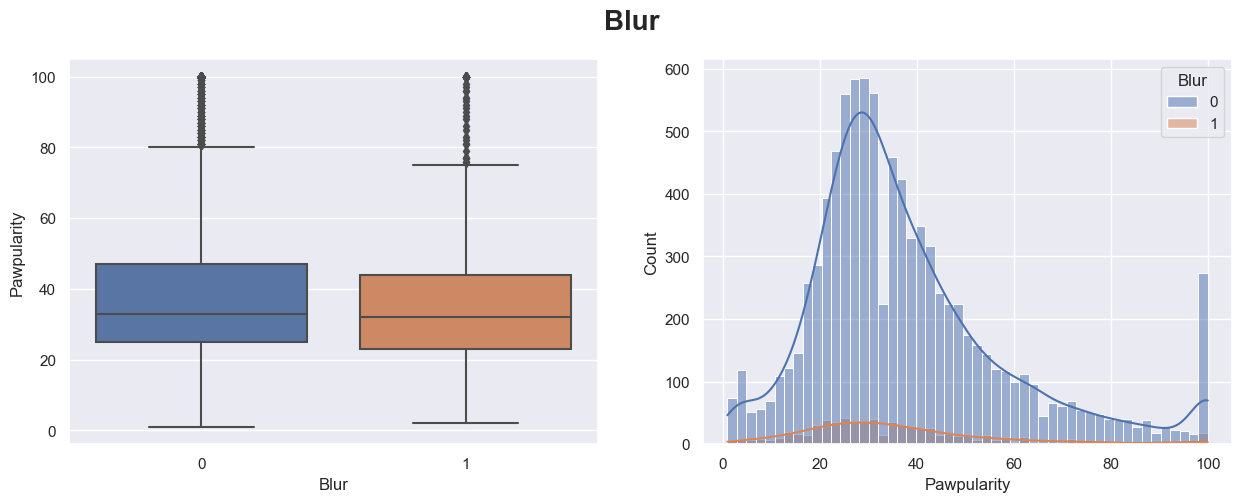

In [10]:
import warnings
warnings.filterwarnings("ignore")

#Now lets do the same for all the variables with a simple for loop:

#get a the column names into a list
feature_variables = train_df.columns.values.tolist()

#for each of the feature variables, doesn't include Id and Pawpularity by using [1:-1]
#show a boxplot and distribution plot against pawpularity
for variable in feature_variables[1:-1]:
    fig, ax = plt.subplots(1,2)

    sns.boxplot(data=train_df, x=variable, y='Pawpularity', ax=ax[0])
    sns.histplot(train_df, x="Pawpularity", hue=variable, kde=True, ax=ax[1])
    
    plt.suptitle(variable, fontsize=20, fontweight='bold')
    fig.show()

## Explore Image-Data

In [11]:
#first, what's the first image in the train_jpg dataset.
print(train_jpg[0])

../input/train/2ba808b11e2e7302c65c1142fae20328.jpg


(854, 1280, 3)


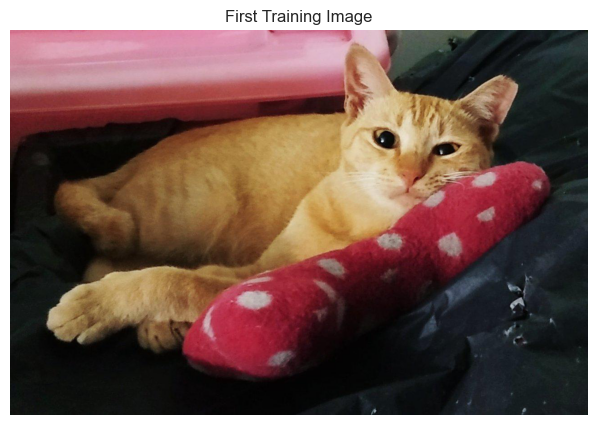

In [12]:
#let's plot that first image:

#get the image path we just printed
image_path = train_jpg[0]

#use plt.imread() to read in that image file
image_array = plt.imread(image_path) 
print(image_array.shape)

#then plt.imshow() can display it for you
plt.imshow(image_array)
plt.title('First Training Image') 
plt.axis('off') #turns off the gridlines
plt.show()

image 0's dimensions are: (854, 1280, 3)


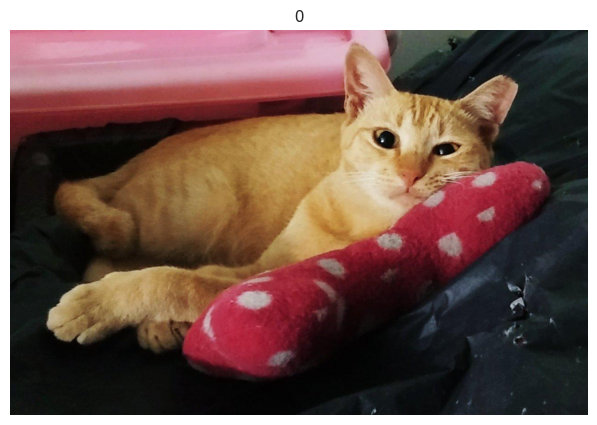

image 1's dimensions are: (960, 1280, 3)


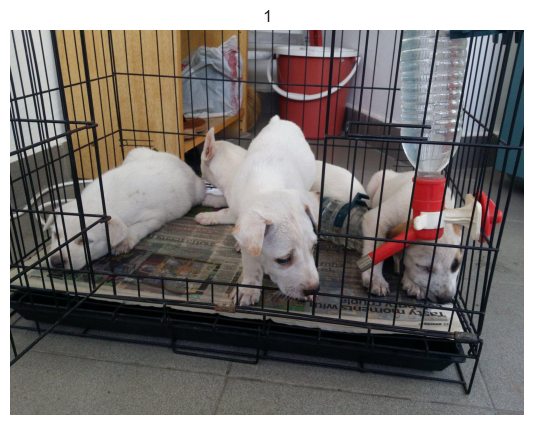

image 2's dimensions are: (960, 1280, 3)


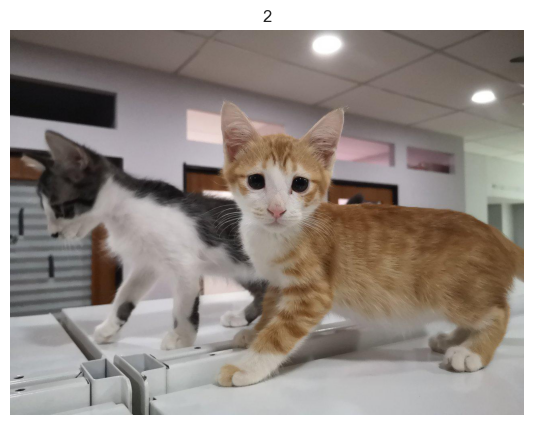

In [13]:
#first let's try printing out the first 3 images with a loop

#The for loop goes for 3 loops 
for x in range(3):
    #this loop goes through index of the train_jpg list of filenames: 0,1,2
    image_path = train_jpg[x]
    #use plt.imread() to read in that image file as an array of numbers between 0-255
    image_array = plt.imread(image_path) 
    #Let's check the image dimensions
    print("image {}'s dimensions are: {}".format(x,image_array.shape))
    #then plt.imshow() can display it for you
    plt.imshow(image_array)
    #title is the index of train_jpg
    plt.title(x) 
    #turn off gridlines
    plt.axis('off')
    #show the image
    plt.show()

In [14]:
# RGB images where each color channel has pixel values between 0-255
image_array.size

3686400

In [15]:
#example of getting the stem from a filename
id_stem = Path(train_jpg[0]).stem
print('Original: ', train_jpg[0])
print('After: ', id_stem)

Original:  ../input/train/2ba808b11e2e7302c65c1142fae20328.jpg
After:  2ba808b11e2e7302c65c1142fae20328


In [16]:
#get a dataframe from train_df that matches the id stem from the filename
#assume all ids/pictures are unique
id_stem_df = train_df.loc[train_df['Id'] == id_stem]
id_stem_df

Id  Subject Focus  Eyes  Face  Near  \
1715  2ba808b11e2e7302c65c1142fae20328              0     1     1     1   

      Action  Accessory  Group  Collage  Human  Occlusion  Info  Blur  \
1715       0          0      0        0      0          0     0     0   

      Pawpularity  
1715           43

In [17]:
#the first part of this code produces a series:
id_stem_series = train_df.loc[train_df['Id'] == id_stem,'Pawpularity']

#to get the value from a pandas series use .iloc - in our case from index 0:
pawpularity_by_id = id_stem_series.iloc[0]
print('Pawpularity of id 7954ebb5c90d9618e34959df0ad5f062 : ', pawpularity_by_id)

Pawpularity of id 7954ebb5c90d9618e34959df0ad5f062 :  43


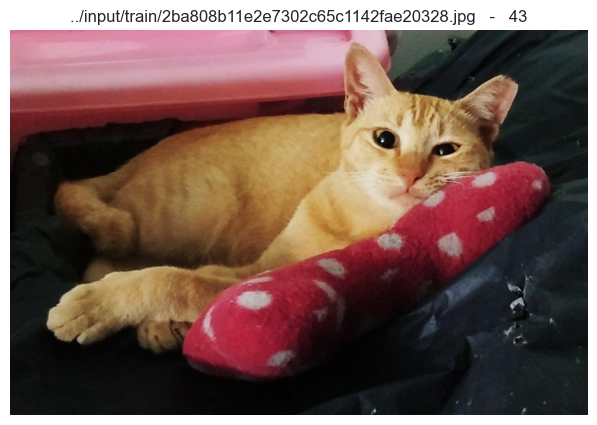

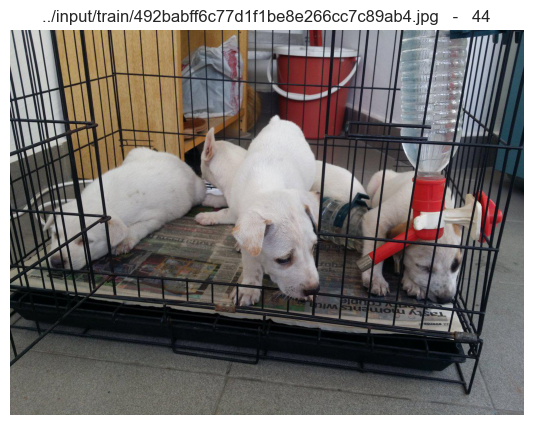

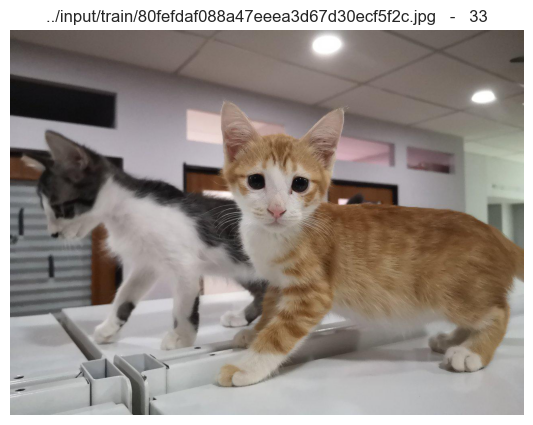

In [18]:
#The for loop goes for 3 loops 
for x in range(3):
    #this loop goes through index of the train_jpg list of filenames: 0,1,2
    image_path = train_jpg[x]
    
    #New addition to get Pawpularity by id from filename
    id_stem = Path(image_path).stem
    id_stem_series = train_df.loc[train_df['Id'] == id_stem,'Pawpularity']
    pawpularity_by_id = id_stem_series.iloc[0]
    
    #use plt.imread() to read in that image file as an array of numbers between 0-255
    image_array = plt.imread(image_path) 
    #then plt.imshow() can display it for you
    plt.imshow(image_array)
    #title is the index of train_jpg
    title = image_path + '   -   ' + str(pawpularity_by_id)
    plt.title(title) 
    #turn off gridlines
    plt.axis('off')
    #show the image
    plt.show()

**function that returns pet pictures based on given pawpularity scores**

In [19]:
def pawpularity_pics(df, num_images, desired_pawpularity, random_state):
    '''The pawpularity_pics() function accepts 4 parameters: df is a dataframe, 
    num_images is the number of images you want displayed, desired_pawpularity 
    is the pawpularity score of pics you want to see, and random state ensures reproducibility.'''
    #how many images to display
    num_images = num_images
    #set the rample state for the sampling for reproducibility
    random_state = random_state
    
    #filter the train_df on the desired_pawpularity and use .sample() to get a sample
    random_sample = df[df["Pawpularity"] == desired_pawpularity].sample(num_images, random_state=random_state).reset_index(drop=True)
    
    #The for loop goes as many loops as specified by the num_images
    for x in range(num_images):
        #start from the id in the dataframe
        image_path_stem = random_sample.iloc[x]['Id']
        root = '../input/train/'
        extension = '.jpg'
        image_path = root + str(image_path_stem) + extension
         
        #get the pawpularity to confirm it worked
        pawpularity_by_id = random_sample.iloc[x]['Pawpularity']
    
        #use plt.imread() to read in the image file
        image_array = plt.imread(image_path)
        #make a subplot space that is 1 down and num_images across
        plt.subplot(1, num_images, x+1)
        #title is the pawpularity score from the id
        title = pawpularity_by_id
        plt.title(title) 
        #turn off gridlines
        plt.axis('off')
        #then plt.imshow() can display it for you
        plt.imshow(image_array)
    plt.show()
    plt.close()

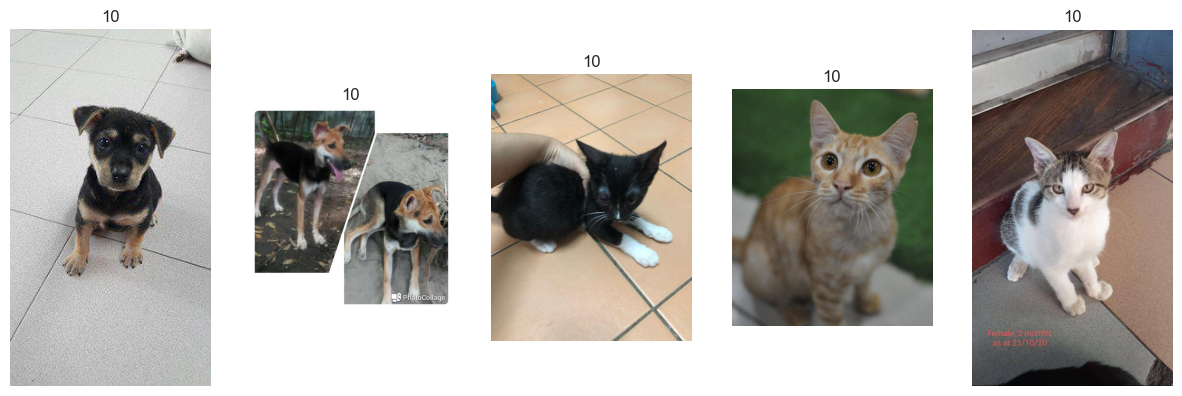

In [20]:
#Input the train_df, and ask for 5 radom images at pawpularity score 10 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 10
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

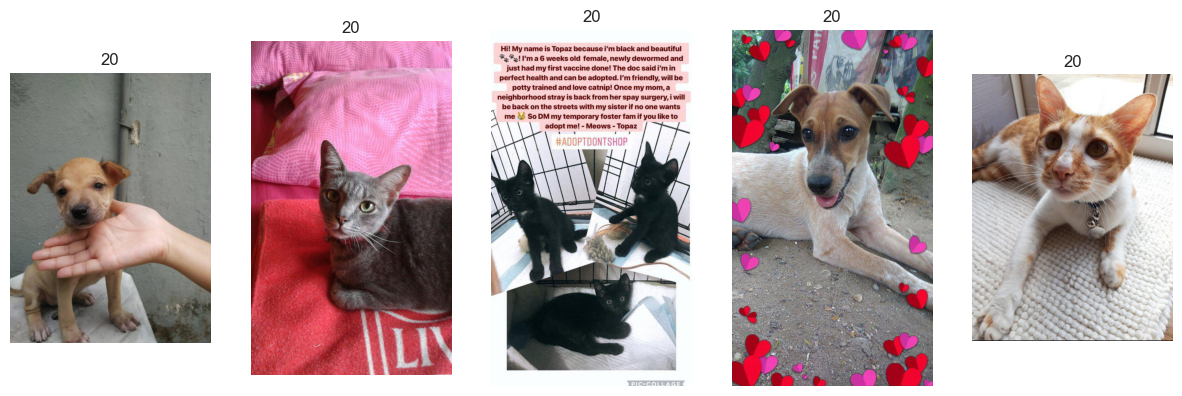

In [21]:
#Input the train_df, and ask for 5 radom images at pawpularity score 20 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 20
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

*Ausbau-Möglichkeiten: Feel free to change up the code in your own notebooks to improve upon this function! For example, you can add error handling or modify it to accept a range of pawpularity scores.*

## Modeling

### Data Pre-Processing

In [22]:
#packages
#basics
import os
import numpy as np
import pandas as pd

#images
import cv2

#modeling
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.client import device_lib

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#Check to see
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [24]:
#check if GPU available to use - works well in google colab but kaggle varies. Can use just CPU, GPU, or TPU or mix. 
if 'GPU' in str(device_lib.list_local_devices()):
    config = tf.compat.v1.ConfigProto(device_count = {'GPU': 0})
    sess = tf.compat.v1.Session(config=config) 

Metal device set to: Apple M1 Pro


2022-12-19 20:20:57.248606: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-19 20:20:57.248727: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
#get the data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [26]:
#Modify the Id such that each Id is the full image path. In the form
def train_id_to_path(x):
    return '../input/train/' + x + ".jpg"
def test_id_to_path(x):
    return '../input/test/' + x + ".jpg"

#Read in the data and drop unnecessary columns
train = pd.read_csv('../input/train.csv')
train = train.drop(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],axis=1)

test = pd.read_csv('../input/test.csv')
test = test.drop(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],axis=1)

#Add the .jpg extensions to the image file name ids
train["img_path"] = train["Id"].apply(train_id_to_path)
test["img_path"] = test["Id"].apply(test_id_to_path)

In [27]:
train

Id  Pawpularity  \
0     0007de18844b0dbbb5e1f607da0606e0           63   
1     0009c66b9439883ba2750fb825e1d7db           42   
2     0013fd999caf9a3efe1352ca1b0d937e           28   
3     0018df346ac9c1d8413cfcc888ca8246           15   
4     001dc955e10590d3ca4673f034feeef2           72   
...                                ...          ...   
9907  ffbfa0383c34dc513c95560d6e1fdb57           15   
9908  ffcc8532d76436fc79e50eb2e5238e45           70   
9909  ffdf2e8673a1da6fb80342fa3b119a20           20   
9910  fff19e2ce11718548fa1c5d039a5192a           20   
9911  fff8e47c766799c9e12f3cb3d66ad228           30   

                                               img_path  
0     ../input/train/0007de18844b0dbbb5e1f607da0606e...  
1     ../input/train/0009c66b9439883ba2750fb825e1d7d...  
2     ../input/train/0013fd999caf9a3efe1352ca1b0d937...  
3     ../input/train/0018df346ac9c1d8413cfcc888ca824...  
4     ../input/train/001dc955e10590d3ca4673f034feeef...  
...                                                 ...  
9907  ../input/train/ffbfa0383c34dc513c95560d6e1fdb5...  
9908  ../input/train/ffcc8532d76436fc79e50eb2e5238e4...  
9909  ../input/train/ffdf2e8673a1da6fb80342fa3b119a2...  
9910  ../input/train/fff19e2ce11718548fa1c5d039a5192...  
9911  ../input/train/fff8e47c766799c9e12f3cb3d66ad22...  

[9912 rows x 3 columns]

In [28]:
#binning columns to test models
train['two_bin_pawp'] = pd.qcut(train['Pawpularity'], q=2, labels=False)
train = train.astype({"two_bin_pawp": str})

train['four_bin_pawp'] = pd.qcut(train['Pawpularity'], q=4, labels=False)
train = train.astype({"four_bin_pawp": str})

train['ten_bin_pawp'] = pd.qcut(train['Pawpularity'], q=10, labels=False)
train = train.astype({"ten_bin_pawp": str})

In [29]:
train2bin_stats = train.groupby('two_bin_pawp')
train2bin_stats.describe()

Pawpularity                                                     
                   count       mean        std   min   25%   50%   75%    max
two_bin_pawp                                                                 
0                 5038.0  23.351727   7.628728   1.0  20.0  25.0  29.0   33.0
1                 4874.0  53.220558  18.673900  34.0  39.0  47.0  62.0  100.0

In [30]:
train4bin_stats = train.groupby('four_bin_pawp')
train4bin_stats.describe()

Pawpularity                                                     
                    count       mean        std   min   25%   50%   75%    max
four_bin_pawp                                                                 
0                  2638.0  17.871494   6.597751   1.0  14.0  20.0  23.0   25.0
1                  2400.0  29.375417   2.240328  26.0  27.0  29.0  31.0   33.0
2                  2401.0  39.198667   3.661639  34.0  36.0  39.0  42.0   46.0
3                  2473.0  66.834209  17.263356  47.0  52.0  62.0  78.0  100.0

In [31]:
train10bin_stats = train.groupby('ten_bin_pawp')
train10bin_stats.describe()

Pawpularity                                                      
                   count       mean        std   min   25%   50%    75%    max
ten_bin_pawp                                                                  
0                 1100.0  11.512727   5.459323   1.0   7.0  13.0   16.0   18.0
1                  998.0  21.278557   1.385033  19.0  20.0  21.0   22.0   23.0
2                 1158.0  25.574266   1.098877  24.0  25.0  26.0   27.0   27.0
3                  940.0  29.000000   0.822992  28.0  28.0  29.0   30.0   30.0
4                  842.0  31.913302   0.804765  31.0  31.0  32.0   33.0   33.0
5                  948.0  35.455696   1.115854  34.0  34.0  35.0   36.0   37.0
6                 1074.0  40.455307   1.677757  38.0  39.0  40.0   42.0   43.0
7                  921.0  47.247557   2.215940  44.0  45.0  47.0   49.0   51.0
8                  953.0  58.261280   4.306525  52.0  55.0  58.0   62.0   66.0
9                  978.0  85.171779  12.107888  67.0  74.0  84.0  100.0  100.0

In [32]:
#show the full training dataframe now
train.head()

Id  Pawpularity  \
0  0007de18844b0dbbb5e1f607da0606e0           63   
1  0009c66b9439883ba2750fb825e1d7db           42   
2  0013fd999caf9a3efe1352ca1b0d937e           28   
3  0018df346ac9c1d8413cfcc888ca8246           15   
4  001dc955e10590d3ca4673f034feeef2           72   

                                            img_path two_bin_pawp  \
0  ../input/train/0007de18844b0dbbb5e1f607da0606e...            1   
1  ../input/train/0009c66b9439883ba2750fb825e1d7d...            1   
2  ../input/train/0013fd999caf9a3efe1352ca1b0d937...            0   
3  ../input/train/0018df346ac9c1d8413cfcc888ca824...            0   
4  ../input/train/001dc955e10590d3ca4673f034feeef...            1   

  four_bin_pawp ten_bin_pawp  
0             3            8  
1             2            6  
2             1            3  
3             0            0  
4             3            9

In [33]:
#Set the size image you want to use
image_height = 128
image_width = 128

#define a function that accepts an image url and outputs an eager tensor
def path_to_eagertensor(image_path):
    raw = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(raw, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    #image = tf.image.resize_with_pad(image, image_height, image_width) #optional with padding to retain original dimensions
    image = tf.image.resize(image, (image_height, image_width))
    return image

In [34]:
#show the image file path for the first image in the training data
print(train['img_path'][0])

../input/train/0007de18844b0dbbb5e1f607da0606e0.jpg


(720, 405, 3)


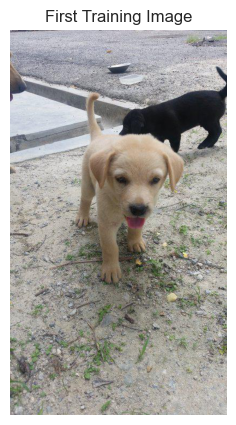

In [35]:
#let's plot that first image:
#use plt.imread() to read in that image file
og_example_image = plt.imread('../input/train/0007de18844b0dbbb5e1f607da0606e0.jpg') 
print(og_example_image.shape)

#then plt.imshow() can display it for you
plt.imshow(og_example_image)
plt.title('First Training Image') 
plt.axis('off') #turns off the gridlines
plt.show()

In [36]:
%%capture
#run the function to show the pre-processing on the first training image only
example_image = path_to_eagertensor('../input/train/0007de18844b0dbbb5e1f607da0606e0.jpg')

2022-12-19 20:20:57.434028: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-19 20:20:57.434049: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


type:  <class 'tensorflow.python.framework.ops.EagerTensor'> 
 shape:  (128, 128, 3)


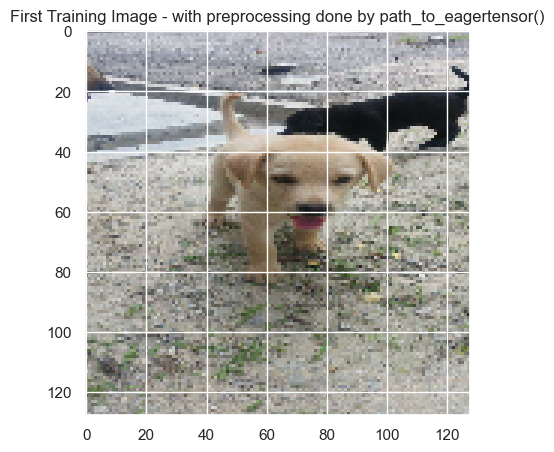

In [37]:
#show the type 
print('type: ', type(example_image),'\n shape: ',example_image.shape)
plt.imshow(example_image)
plt.title('First Training Image - with preprocessing done by path_to_eagertensor()') 
plt.show()

In [38]:
#get all the images in the training folder and put their tensors in a list
X = []
for img in train['img_path']:
    new_img_tensor = path_to_eagertensor(img)
    X.append(new_img_tensor)
    
print(type(X),len(X))
X = np.array(X)
print(type(X),X.shape)

<class 'list'> 9912
<class 'numpy.ndarray'> (9912, 128, 128, 3)


In [39]:
#get all the images in the test folder and put their tensors in a list
X_submission = []
for img in test['img_path']:
    new_img_tensor = path_to_eagertensor(img)
    X_submission.append(new_img_tensor)
    
print(type(X_submission),len(X_submission))
X_submission = np.array(X_submission)
print(type(X_submission),X_submission.shape)

<class 'list'> 8
<class 'numpy.ndarray'> (8, 128, 128, 3)


### Building First Model

In [40]:
#grab the target variable. In our case, Pawpularity
y = train['Pawpularity']
print(type(y))

<class 'pandas.core.series.Series'>


In [41]:
#generate train - test splits  90% train - 10% test
#You usually don't want to do a 90-10 split unless you have a lot of data, 
#but we get to evaluate performance using the leaderboard submissions as well
#So I really want this model to see as many pets as possible in trianing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [42]:
#Show the shape of each of the new arrays
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7929, 128, 128, 3) (1983, 128, 128, 3) (7929,) (1983,)


In [43]:
#define the inputs to your model. Basically the shape of the incoming data
inputs = tf.keras.Input(shape=(image_height,image_width,3))

#start off with x just being those inputs
x = inputs

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (7,7), strides = (2,2), padding='valid', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = inputs, outputs = output)

In [44]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 16)        2368      
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization (BatchN  (None, 61, 61, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 31, 31, 32)       128       
 hNormalization)                                             

In [45]:
#compile the model
model.compile(
    loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

In [46]:
#you can use this to provide your model with different variations of the same images. 
# It doesn't actually make and save a bunch of new images, just defines how new images can be created. 
# These transformations will randomly be applied to the training images as they get used in training.
data_augmentation = ImageDataGenerator(
    rotation_range = 15, 
    zoom_range = 0.15,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.1,
    horizontal_flip = True, 
    fill_mode = "nearest")

### Training with first model

In [47]:
history = model.fit(
    data_augmentation.flow(x_train,y_train,batch_size=32),
    validation_data = (x_test,y_test),
    steps_per_epoch = len(x_train) // 32,
    epochs = 50
)

Epoch 1/50


2022-12-19 20:24:03.845835: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-19 20:24:04.456897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


247/247 [==============================] - ETA: 0s - loss: 491.3806 - rmse: 22.1615 - mae: 16.6677 - mape: 81.0931

2022-12-19 20:24:21.419531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


247/247 [==============================] - 20s 73ms/step - loss: 491.3806 - rmse: 22.1615 - mae: 16.6677 - mape: 81.0931 - val_loss: 532.5173 - val_rmse: 23.0708 - val_mae: 16.0627 - val_mape: 63.5484
Epoch 2/50
247/247 [==============================] - 16s 66ms/step - loss: 447.9850 - rmse: 21.1596 - mae: 15.7969 - mape: 78.3867 - val_loss: 446.4124 - val_rmse: 21.1224 - val_mae: 15.4813 - val_mape: 75.5905
Epoch 3/50
247/247 [==============================] - 16s 63ms/step - loss: 438.9278 - rmse: 20.9444 - mae: 15.6724 - mape: 78.7387 - val_loss: 443.9213 - val_rmse: 21.0632 - val_mae: 15.6305 - val_mape: 77.7248
Epoch 4/50
247/247 [==============================] - 16s 63ms/step - loss: 439.0140 - rmse: 20.9464 - mae: 15.6875 - mape: 78.8318 - val_loss: 443.4353 - val_rmse: 21.0516 - val_mae: 15.5045 - val_mape: 77.8084
Epoch 5/50
247/247 [==============================] - 16s 63ms/step - loss: 435.9924 - rmse: 20.8740 - mae: 15.5876 - mape: 78.2556 - val_loss: 445.7549 - val_rmse

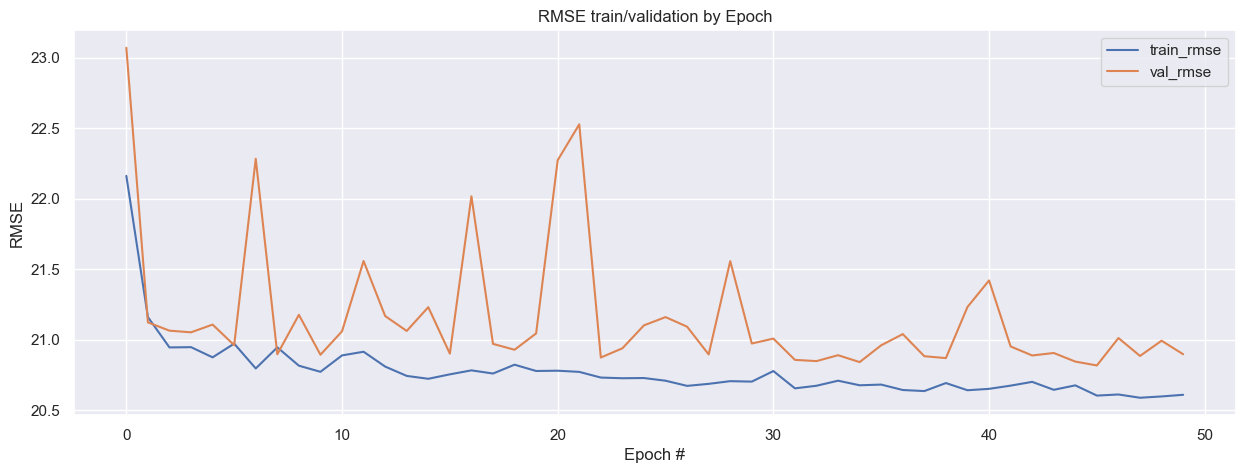

In [48]:
plt.figure()
plt.plot(history.history["rmse"], label="train_rmse")
plt.plot(history.history["val_rmse"], label="val_rmse")
#plt.xticks(range(0,60))
plt.title("RMSE train/validation by Epoch")
plt.xlabel("Epoch #")
plt.ylabel("RMSE")
plt.legend(loc="upper right")

### Building Second Model

In [49]:
from keras.models import Sequential
from keras.layers import Dense

BATCH_SIZE = 32
IMG_HEIGHT = 128 # Let's try to arbitrarily set 150px x 150px images
IMG_WIDTH = 128
IMG_CHANNELS = 3


# Our neural network is built as a Sequential model with a single hidden layer
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Dense(units=128, activation='relu'), # The hidden layer adds nonlinearity with the ReLU activation function
    tf.keras.layers.Dense(units=1, activation=None)
])

# Let's compile it with Adam, a well-suited optimiser for CV problems
model2.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [50]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               6291584   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 6,291,713
Trainable params: 6,291,713
Non-trainable params: 0
_________________________________________________________________


### Training with second model

In [51]:
# And let's now train our model with the training and evaluation data
history = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50


2022-12-19 20:37:14.698831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


248/248 [==============================] - ETA: 0s - loss: 547.7050 - root_mean_squared_error: 23.4031

2022-12-19 20:37:20.076978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


248/248 [==============================] - 6s 24ms/step - loss: 547.7050 - root_mean_squared_error: 23.4031 - val_loss: 520.1613 - val_root_mean_squared_error: 22.8070
Epoch 2/50
248/248 [==============================] - 5s 20ms/step - loss: 490.5324 - root_mean_squared_error: 22.1480 - val_loss: 498.0197 - val_root_mean_squared_error: 22.3164
Epoch 3/50
248/248 [==============================] - 5s 21ms/step - loss: 466.6451 - root_mean_squared_error: 21.6020 - val_loss: 478.9791 - val_root_mean_squared_error: 21.8856
Epoch 4/50
248/248 [==============================] - 5s 20ms/step - loss: 461.9669 - root_mean_squared_error: 21.4934 - val_loss: 481.1041 - val_root_mean_squared_error: 21.9341
Epoch 5/50
248/248 [==============================] - 5s 20ms/step - loss: 465.5980 - root_mean_squared_error: 21.5777 - val_loss: 513.0676 - val_root_mean_squared_error: 22.6510
Epoch 6/50
248/248 [==============================] - 5s 20ms/step - loss: 458.1514 - root_mean_squared_error: 21.40

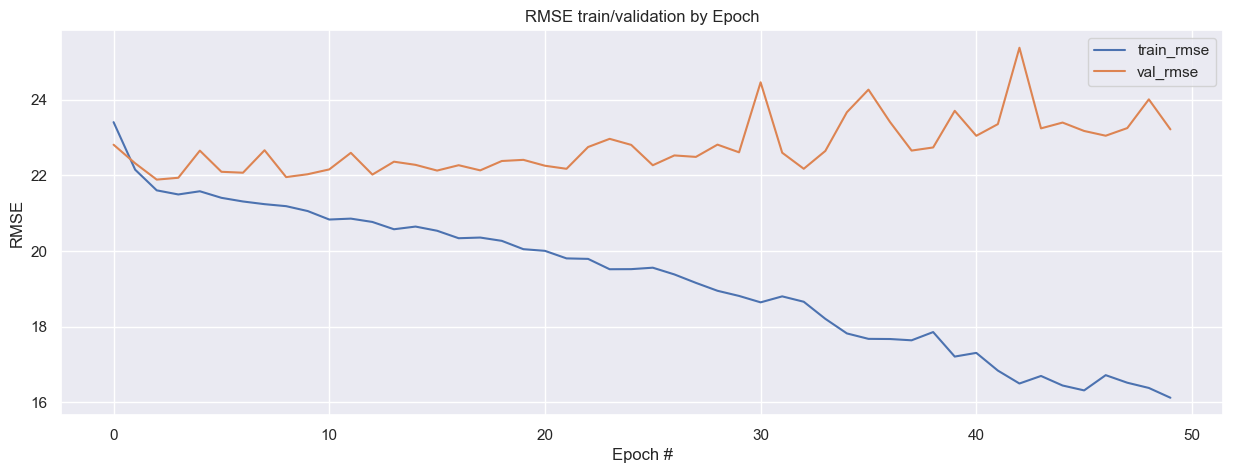

In [52]:
plt.figure()
plt.plot(history.history["root_mean_squared_error"], label="train_rmse")
plt.plot(history.history["val_root_mean_squared_error"], label="val_rmse")
#plt.xticks(range(0,60))
plt.title("RMSE train/validation by Epoch")
plt.xlabel("Epoch #")
plt.ylabel("RMSE")
plt.legend(loc="upper right")

## Prediction

### Using first model to predict

In [53]:
#predict on the submission data
cnn_pred = model.predict(X_submission)
print(X_submission.shape, type(X_submission))
print(cnn_pred.shape, type(cnn_pred))

2022-12-19 20:41:31.707755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 467ms/step
(8, 128, 128, 3) <class 'numpy.ndarray'>
(8, 1) <class 'numpy.ndarray'>


In [54]:
#put the submission predictions alongside their associated Ids
cnn = pd.DataFrame()
cnn['Id'] = test['Id']
cnn['Pawpularity'] = cnn_pred
# cnn.to_csv('submission.csv',index=False)

In [55]:
cnn.head(10)

Id  Pawpularity
0  4128bae22183829d2b5fea10effdb0c3    39.236156
1  43a2262d7738e3d420d453815151079e    39.745842
2  4e429cead1848a298432a0acad014c9d    39.863823
3  80bc3ccafcc51b66303c2c263aa38486    39.073315
4  8f49844c382931444e68dffbe20228f4    39.611759
5  b03f7041962238a7c9d6537e22f9b017    40.507084
6  c978013571258ed6d4637f6e8cc9d6a3    40.430843
7  e0de453c1bffc20c22b072b34b54e50f    39.026413

In [56]:
#testing_example_image = plt.imread('../input/test/4128bae22183829d2b5fea10effdb0c3.jpg') 
#print(testing_example_image.shape)
#then plt.imshow() can display it for you
#plt.imshow(testing_example_image)
#plt.title('First Testing Image \n Predicted Pawpularity = {}'.format(cnn['Pawpularity'].iloc[0])) 
#plt.axis('off') #turns off the gridlines
#plt.show()

### Using second model to predict

In [57]:
#predict on the submission data
cnn_pred = model2.predict(X_submission)
print(X_submission.shape, type(X_submission))
print(cnn_pred.shape, type(cnn_pred))

1/1 [==============================] - 0s 50ms/step
(8, 128, 128, 3) <class 'numpy.ndarray'>
(8, 1) <class 'numpy.ndarray'>


2022-12-19 20:41:32.049376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [58]:
#put the submission predictions alongside their associated Ids
cnn = pd.DataFrame()
cnn['Id'] = test['Id']
cnn['Pawpularity'] = cnn_pred
# cnn.to_csv('submission.csv',index=False)

In [59]:
cnn.head(10)

Id  Pawpularity
0  4128bae22183829d2b5fea10effdb0c3    23.772001
1  43a2262d7738e3d420d453815151079e    21.183437
2  4e429cead1848a298432a0acad014c9d    24.610788
3  80bc3ccafcc51b66303c2c263aa38486    28.234583
4  8f49844c382931444e68dffbe20228f4    22.645144
5  b03f7041962238a7c9d6537e22f9b017    23.667103
6  c978013571258ed6d4637f6e8cc9d6a3    34.505577
7  e0de453c1bffc20c22b072b34b54e50f    23.288931

### Prediction of a new image with first model

In [60]:
#Empty List
Sample_image_prediction = []
#Preprocess with our function
sample_new_img_tensor = path_to_eagertensor('../puppy.jpg')
Sample_image_prediction.append(sample_new_img_tensor)
Sample_image_prediction = np.array(Sample_image_prediction)
#Show data type is good to input into model
print(type(Sample_image_prediction),Sample_image_prediction.shape)

<class 'numpy.ndarray'> (1, 128, 128, 3)


In [61]:
sample_cnn_pred = model.predict(Sample_image_prediction)
print(sample_cnn_pred,sample_cnn_pred.shape, type(sample_cnn_pred))

1/1 [==============================] - 0s 122ms/step
[[41.81043]] (1, 1) <class 'numpy.ndarray'>


(1365, 2048, 3)


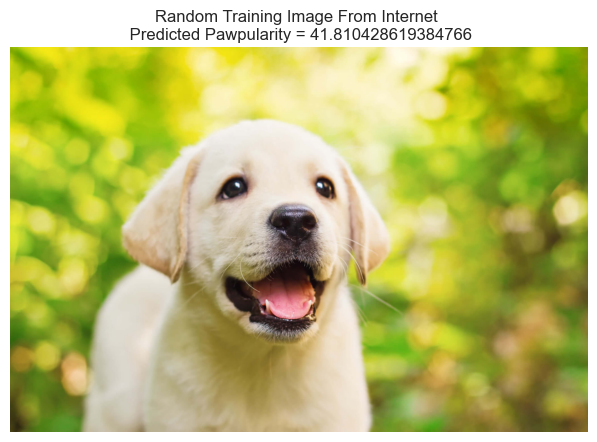

In [62]:
sample_example_image = plt.imread('../puppy.jpg') 
print(sample_example_image.shape)
#then plt.imshow() can display it for you
plt.imshow(sample_example_image)
plt.title('Random Training Image From Internet \n Predicted Pawpularity = {}'.format(sample_cnn_pred[0][0])) 
plt.axis('off') #turns off the gridlines
plt.show()

### Prediction of a new image with second model

In [63]:
#Empty List
Sample_image_prediction = []
#Preprocess with our function
sample_new_img_tensor = path_to_eagertensor('../puppy.jpg')
Sample_image_prediction.append(sample_new_img_tensor)
Sample_image_prediction = np.array(Sample_image_prediction)
#Show data type is good to input into model
print(type(Sample_image_prediction),Sample_image_prediction.shape)

<class 'numpy.ndarray'> (1, 128, 128, 3)


In [64]:
sample_cnn_pred = model2.predict(Sample_image_prediction)
print(sample_cnn_pred,sample_cnn_pred.shape, type(sample_cnn_pred))

1/1 [==============================] - 0s 22ms/step
[[37.01947]] (1, 1) <class 'numpy.ndarray'>


(1365, 2048, 3)


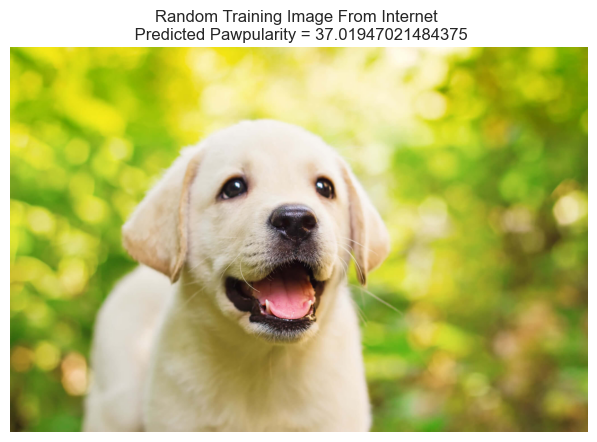

In [65]:
sample_example_image = plt.imread('../puppy.jpg') 
print(sample_example_image.shape)
#then plt.imshow() can display it for you
plt.imshow(sample_example_image)
plt.title('Random Training Image From Internet \n Predicted Pawpularity = {}'.format(sample_cnn_pred[0][0])) 
plt.axis('off') #turns off the gridlines
plt.show()